<a href="https://colab.research.google.com/github/viniciusgomesbatista/MaterialsScience/blob/main/Concrete_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.7 MB/s

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np                                    # Numpy
import pandas as pd

Mounted at /content/drive


In [ ]:
                                # Pandas
from sklearn.model_selection import train_test_split  # Scikit separar treino/teste
import pycaret                                        # Pycaret
from scipy.stats import pearsonr
#from pycaret.regression import *                      # Pycaret para Regressão

In [ ]:
bruto= pd.read_csv('/content/drive/MyDrive/Estudos/Pós Graduação/Dados/concrete_data.csv')
df = bruto.copy()

In [ ]:
df.rename(columns={'Cement':'Cimento', 'Blast Furnace Slag':'Escória de alto-forno', 'Fly Ash':'Cinzas volantes', 'Water':'Água', 'Superplasticizer':'Superplastificante',
       'Coarse Aggregate':'Agregado Grosso', 'Fine Aggregate':'Agregado Fino','Age':'Idade', 'Strength':'Resistência à compressão'}, inplace=True)

In [ ]:
info = df.info()
info.DataFrame()
info.to_excel('info.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cimento                   1030 non-null   float64
 1   Escória de alto-forno     1030 non-null   float64
 2   Cinzas volantes           1030 non-null   float64
 3   Água                      1030 non-null   float64
 4   Superplastificante        1030 non-null   float64
 5   Agregado Grosso           1030 non-null   float64
 6   Agregado Fino             1030 non-null   float64
 7   Idade                     1030 non-null   int64  
 8   Resistência à compressão  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


AttributeError: 'NoneType' object has no attribute 'DataFrame'

In [ ]:
descr = df.describe().round(2).T
descr.to_excel('descr.xlsx')
descr

,count,mean,std,min,25%,50%,75%,max
Cimento,1030.0,281.17,104.51,102.00,192.38,272.90,350.00,540.0
Escória de alto-forno,1030.0,73.90,86.28,0.00,0.00,22.00,142.95,359.4
Cinzas volantes,1030.0,54.19,64.00,0.00,0.00,0.00,118.30,200.1
Água,1030.0,181.57,21.35,121.80,164.90,185.00,192.00,247.0
Superplastificante,1030.0,6.20,5.97,0.00,0.00,6.40,10.20,32.2
Agregado Grosso,1030.0,972.92,77.75,801.00,932.00,968.00,1029.40,1145.0
Agregado Fino,1030.0,773.58,80.18,594.00,730.95,779.50,824.00,992.6
Idade,1030.0,45.66,63.17,1.00,7.00,28.00,56.00,365.0
Resistência à compressão,1030.0,35.82,16.71,2.33,23.71,34.44,46.14,82.6


In [ ]:
df.corr()

,Cimento,Escória de alto-forno,Cinzas volantes,Água,Superplastificante,Agregado Grosso,Agregado Fino,Idade,Resistência à compressão
Cimento,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Escória de alto-forno,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Cinzas volantes,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Água,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplastificante,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Agregado Grosso,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Agregado Fino,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Idade,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Resistência à compressão,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


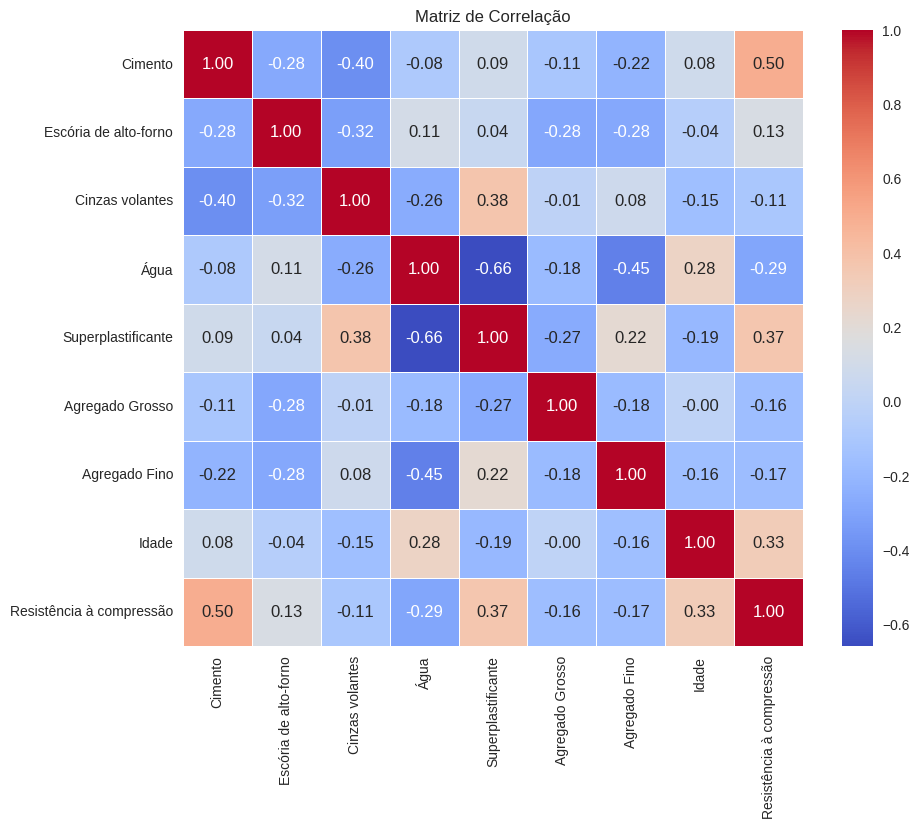

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um gráfico de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
correlation_matrix = df.corr(method='pearson')
n = len(df)  # número de observações

# Inicializando uma matriz para armazenar os valores de significância
significance_matrix = np.zeros((len(correlation_matrix), len(correlation_matrix)))

# Calculando a significância para cada par de variáveis
for i, column1 in enumerate(df.columns):
    for j, column2 in enumerate(df.columns):
        if i != j:
            correlation, p_value = pearsonr(df[column1], df[column2])
            significance_matrix[i, j] = p_value

# Transformando a matriz de significância em um DataFrame
significance_df = pd.DataFrame(significance_matrix, index=df.columns, columns=df.columns)

# Exibindo a matriz de correlação e a matriz de significância
display(correlation_matrix)
print("\nMatriz de Significância:")
display(significance_df)

,Cimento,Escória de alto-forno,Cinzas volantes,Água,Superplastificante,Agregado Grosso,Agregado Fino,Idade,Resistência à compressão
Cimento,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Escória de alto-forno,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Cinzas volantes,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Água,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplastificante,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Agregado Grosso,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Agregado Fino,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Idade,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Resistência à compressão,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000



Matriz de Significância:


,Cimento,Escória de alto-forno,Cinzas volantes,Água,Superplastificante,Agregado Grosso,Agregado Fino,Idade,Resistência à compressão
Cimento,0.000000e+00,2.335840e-19,2.570151e-40,8.803239e-03,2.999836e-03,4.386126e-04,4.824934e-13,8.508977e-03,1.324183e-65
Escória de alto-forno,2.335840e-19,0.000000e+00,1.560234e-26,5.650156e-04,1.652382e-01,1.464700e-20,3.148809e-20,1.559033e-01,1.413567e-05
Cinzas volantes,2.570151e-40,1.560234e-26,0.000000e+00,5.354343e-17,3.136989e-36,7.495000e-01,1.109236e-02,6.419136e-07,6.751584e-04
Água,8.803239e-03,5.650156e-04,5.354343e-17,0.000000e+00,1.496255e-128,3.797076e-09,1.156586e-52,1.106037e-19,2.350655e-21
Superplastificante,2.999836e-03,1.652382e-01,3.136989e-36,1.496255e-128,0.000000e+00,3.840559e-18,4.856531e-13,4.504501e-10,5.131485e-34
Agregado Grosso,4.386126e-04,1.464700e-20,7.495000e-01,3.797076e-09,3.840559e-18,0.000000e+00,8.044990e-09,9.229859e-01,1.018351e-07
Agregado Fino,4.824934e-13,3.148809e-20,1.109236e-02,1.156586e-52,4.856531e-13,8.044990e-09,0.000000e+00,4.792226e-07,6.704114e-08
Idade,8.508977e-03,1.559033e-01,6.419136e-07,1.106037e-19,4.504501e-10,9.229859e-01,4.792226e-07,0.000000e+00,2.106341e-27
Resistência à compressão,1.324183e-65,1.413567e-05,6.751584e-04,2.350655e-21,5.131485e-34,1.018351e-07,6.704114e-08,2.106341e-27,0.000000e+00


In [ ]:
correlation_matrix.to_excel('correl.xlsx')
significance_df.to_excel('signifc.xlsx')

#Treino

In [ ]:
train, test = train_test_split(df, test_size=0.2,
                                     random_state=42)

In [ ]:
reg = setup(data = train,           # Banco de dados
              target = 'Strength',   # Desfecho que estamos tentando prever
              train_size = 0.7)     # Proporção do banco de treino

,Description,Value
0,Session id,5869
1,Target,Strength
2,Target type,Regression
3,Original data shape,"(824, 9)"
4,Transformed data shape,"(824, 9)"
5,Transformed train set shape,"(576, 9)"
6,Transformed test set shape,"(248, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Treinar modelos
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.6745,29.0737,5.2930,0.9019,0.1644,0.1250,0.1720
et,Extra Trees Regressor,3.5477,30.7255,5.4688,0.8951,0.1702,0.1243,0.3230
xgboost,Extreme Gradient Boosting,3.6607,32.6473,5.5615,0.8910,0.1685,0.1248,0.2410
gbr,Gradient Boosting Regressor,4.1864,33.1868,5.6731,0.8880,0.1815,0.1458,0.5050
rf,Random Forest Regressor,4.0442,33.7297,5.7047,0.8853,0.1818,0.1431,0.3960
dt,Decision Tree Regressor,4.9607,57.0801,7.4862,0.8028,0.2277,0.1702,0.0730
ada,AdaBoost Regressor,6.4464,62.4285,7.8634,0.7865,0.2885,0.2730,0.1820
knn,K Neighbors Regressor,7.6191,104.5381,10.1758,0.6400,0.3222,0.2857,0.0760
br,Bayesian Ridge,8.3473,113.6791,10.6029,0.6106,0.3383,0.3220,0.0760
llar,Lasso Least Angle Regression,8.3586,113.6923,10.6027,0.6105,0.3377,0.3215,0.0450


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(random_state=5869)

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7998,31.4092,5.6044,0.8756,0.1918,0.1418
1,3.7806,31.5257,5.6148,0.8962,0.1931,0.1557
2,3.8946,29.5728,5.4381,0.8889,0.1644,0.1199
3,3.4096,22.3917,4.7320,0.9180,0.1539,0.1215
4,4.9595,59.5306,7.7156,0.8364,0.1926,0.1515
5,3.6242,28.5755,5.3456,0.8936,0.1508,0.1198
6,3.7513,29.1612,5.4001,0.9121,0.1531,0.1072
7,3.3299,21.1887,4.6031,0.9304,0.1350,0.1098
8,3.5530,25.9222,5.0914,0.9143,0.1586,0.1118


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lightgbm = tune_model(lightgbm)
print(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2388,35.7037,5.9753,0.8586,0.2095,0.1600
1,3.8182,30.6824,5.5392,0.8990,0.2046,0.1709
2,3.5913,24.6147,4.9613,0.9075,0.1535,0.1122
3,3.1247,18.1134,4.2560,0.9337,0.1432,0.1160
4,4.8509,50.5842,7.1123,0.8610,0.1854,0.1485
5,3.7530,32.2558,5.6794,0.8799,0.1549,0.1257
6,4.0534,33.5822,5.7950,0.8988,0.1527,0.1179
7,3.5912,22.6796,4.7623,0.9255,0.1546,0.1287
8,3.9005,27.3088,5.2258,0.9098,0.2065,0.1293


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


LGBMRegressor(random_state=5869)


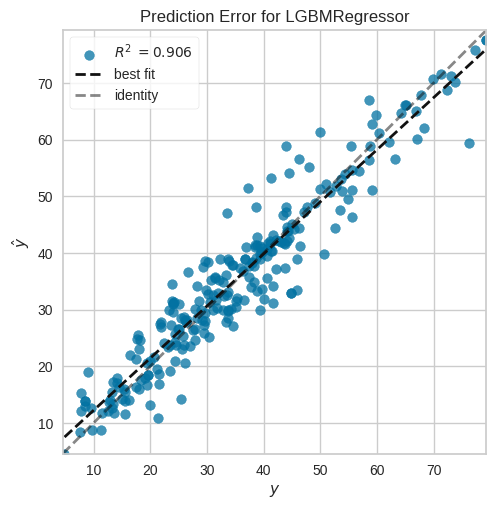

In [ ]:
# Comparar predições e resultados do banco de teste
plot_model(lightgbm, plot='error')

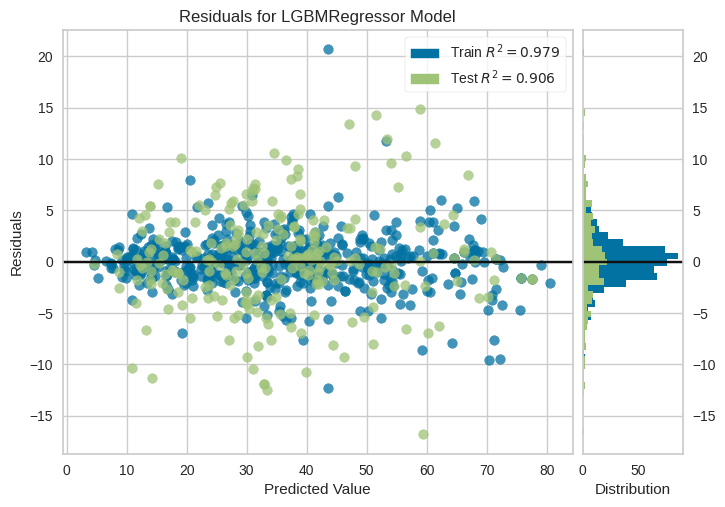

In [ ]:
# Comparar os resíduos
plot_model(lightgbm, plot='residuals')

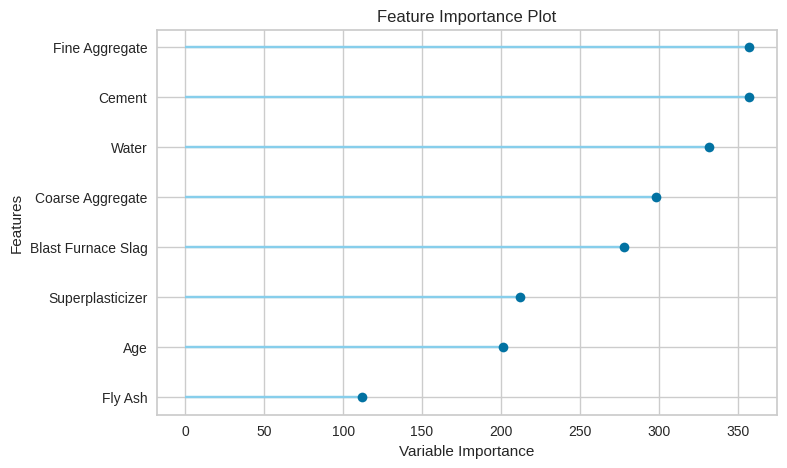

In [ ]:
plot_model(lightgbm, 'feature')

In [ ]:
predict_model(lightgbm, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.7707,28.8448,5.3707,0.8881,0.1499,0.1159


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,prediction_label
31,266.000000,114.000000,0.0,228.000000,0.0,932.000000,670.000000,365,52.910000,50.464816
109,362.600006,189.000000,0.0,164.899994,11.6,944.700012,755.799988,7,55.900002,43.571005
136,389.899994,189.000000,0.0,145.899994,22.0,944.700012,755.799988,28,74.500000,76.074887
88,362.600006,189.000000,0.0,164.899994,11.6,944.700012,755.799988,3,35.299999,33.347159
918,145.000000,0.000000,179.0,202.000000,8.0,824.000000,869.000000,28,10.540000,11.656552
...,...,...,...,...,...,...,...,...,...,...
482,446.000000,24.000000,79.0,162.000000,11.6,967.000000,712.000000,56,56.139999,56.433358
545,255.000000,0.000000,0.0,192.000000,0.0,889.799988,945.000000,28,18.750000,19.670207
110,286.299988,200.899994,0.0,144.699997,11.2,1004.599976,803.700012,7,38.000000,40.283878
514,424.000000,22.000000,132.0,168.000000,8.9,822.000000,750.000000,56,74.360001,66.037675


In [ ]:
lightgbm_final = finalize_model(lightgbm)

In [ ]:
save_model(lightgbm, 'snf_saved_04072020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Cement', 'Blast Furnace Slag',
                                              'Fly Ash', 'Water',
                                              'Superplasticizer',
                                              'Coarse Aggregate',
                                              'Fine Aggregate', 'Age'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', LGBMRegressor(random_state=5869))]),
 'snf_saved_04072020.pkl')